# Contains all the library imports 

In [0]:
!pip install kmodes
!pip install hdbscan
!pip install scikit-plot

     |████████████████████████████████| 4.4MB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.24-cp27-cp27mu-linux_x86_64.whl size=2208725 sha256=3e532c4190778e532121f26d80d62b403f4dfb011f5e72c5ed686a871b9596bf
  Stored in directory: /root/.cache/pip/wheels/6a/5a/ab/a3247c72fa70b67699d5f8be94bd0c2d3d38864825d773b9f1
Successfully built hdbscan
  Created wheel for scikit-plot: filename=scikit_plot-0.3.7-cp27-none-any.whl size=34505 sha256=b4a79cd217979df5c3e043abcb2dde711f033ea47d0bb91e476f38183e5ac2e6
  Stored in directory: /root/.cache/pip/wheels/a7/ac/fe/750d7565f5d867f9fd82b2408a76a6170d21ef0628d30502ec
Successfully built scikit-plot


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import datetime
from kmodes.kmodes import KModes

%matplotlib inline 
#just a snall hack to print MatPlotlib visualizaions inline in notebooks


In [0]:
#for SO clustering 
from copy import deepcopy

import hdbscan
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tqdm import tqdm

matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

ImportError: ignored

Imports the datasets as Pandas dataframes

In [0]:
kaggle = pd.read_csv('multipleChoiceResponses.csv')[1:]
soflow = pd.read_csv('survey_results_public.csv')


soflow_ds = pd.DataFrame(index=None, columns=soflow.columns)
soflow_test = pd.DataFrame(soflow,index=None, columns=soflow.columns)

Prints the dimenions of the dataframes

In [0]:
print ("Stack Overflow 2018 Developer Survey")
print(soflow.shape)
print(soflow.info())
print('---------------------------------------------------------------------------------------------------------')
print ("2018 Kaggle ML & DS Survey")
print(kaggle.shape)
print(kaggle.info())

Stack Overflow 2018 Developer Survey
(98855, 129)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB
None
---------------------------------------------------------------------------------------------------------
2018 Kaggle ML & DS Survey
(23859, 395)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23859 entries, 1 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 71.9+ MB
None


In [0]:
from google.colab import drive
drive.mount('/content/drive/kagglevsso')

Skew | Null values 

In [0]:
print(soflow.isnull().sum())
print('\n')

print(soflow.describe())
print('\n')

print('Skewness of the below features:')
print(soflow.skew())

print('\n')

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

In [0]:
print(kaggle.isnull().sum())
print('\n')

print(kaggle.describe())
print('\n')

print('Skewness of the below features:')
print(kaggle.skew())

print('\n')

Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                       421
Q5                                       912
Q6                                       959
Q6_OTHER_TEXT                              0
Q7                                      2174
Q7_OTHER_TEXT                              0
Q8                                      2758
Q9                                      3674
Q10                                     3190
Q11_Part_1                             14327
Q11_Part_2                             18378
Q11_Part_3                             18626
Q11_Part_4                             16626
Q11_Part_5                             18925
Q11_Part_6                             20388
Q11_Part_7                             22667
Q11_OTHER_TEXT                             0
Q12_MULTIP

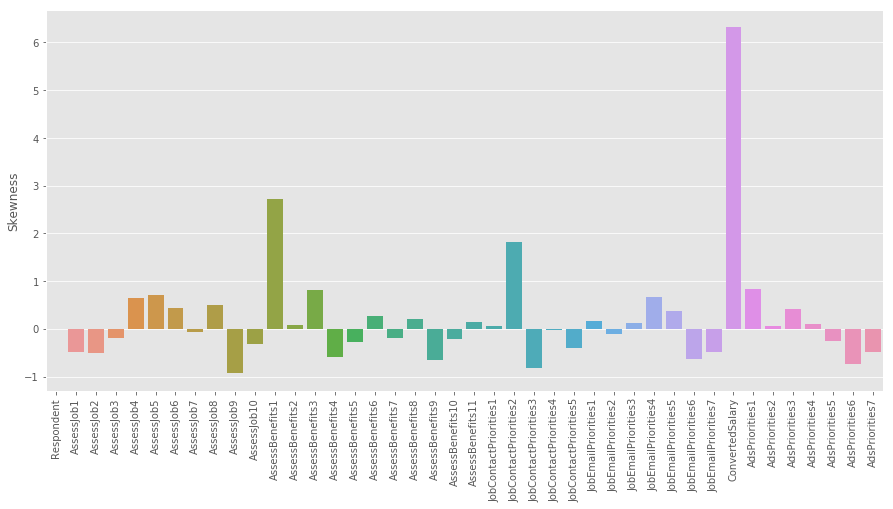

In [0]:
#visualizing skewness
skew = soflow.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()
print('\n')




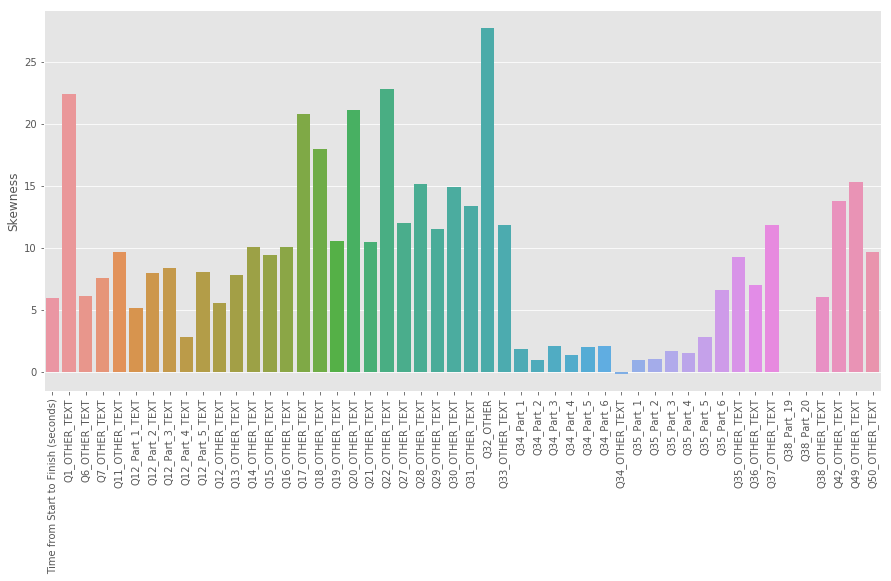

In [0]:
#visualizing skewness
skew = kaggle.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()
print('\n')

In [0]:
print(kaggle.isnull().sum())
print('\n')

print(kaggle.describe())
print('\n')

print('Skewness of the below features:')
print(kaggle.skew())

print('\n')

Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                       421
Q5                                       912
Q6                                       959
Q6_OTHER_TEXT                              0
Q7                                      2174
Q7_OTHER_TEXT                              0
Q8                                      2758
Q9                                      3674
Q10                                     3190
Q11_Part_1                             14327
Q11_Part_2                             18378
Q11_Part_3                             18626
Q11_Part_4                             16626
Q11_Part_5                             18925
Q11_Part_6                             20388
Q11_Part_7                             22667
Q11_OTHER_TEXT                             0
Q12_MULTIP

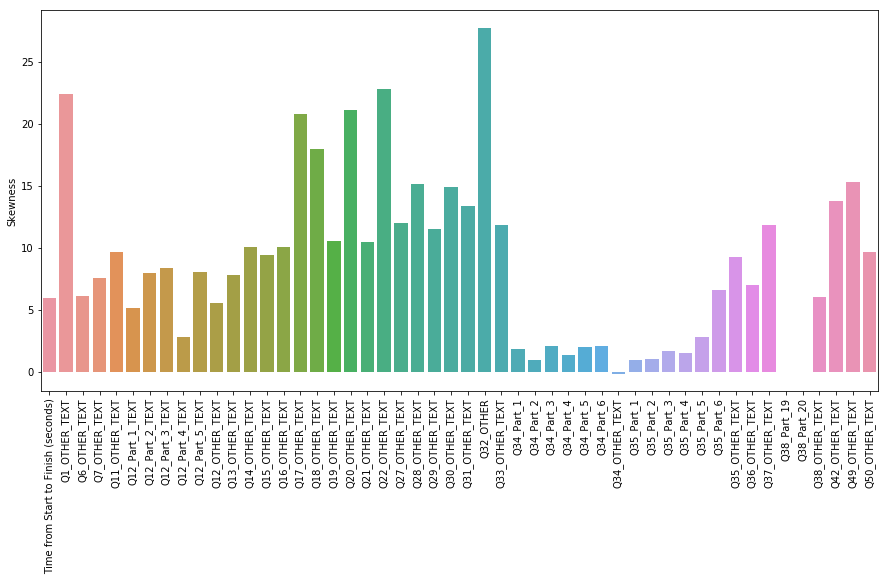

In [0]:
#visualizing skewness
skew = kaggle.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness', data=skew_df)
plt.xticks(rotation=90)
plt.show()
print('\n')

Logic to build Filter martrix/series based on business logic in SO Data

In [0]:
data_science_keywords = ["machine","Data or business analyst"]

result1 = soflow['DevType'].str.contains('machine') 
result2 = soflow['DevType'].str.contains('Data or business analyst') 
#soflow_test['DS_Dev_Flag'] =soflow[soflow['DevType'].str.contains('|'.join(data_science_keywords)).any(level=0)][1]
#soflow_test['DS_Dev_Flag'] 
#(soflow_test['DevType'].stack())

 |Long running| Filter out the SOData to get only surveys of Data Scientists

In [0]:
count=0
for item in result1.iteritems():
  if item[1] == True:
    count +=1    
    #print(soflow.iloc[[item[0]]])
    soflow_ds=soflow_ds.append(soflow.iloc[[item[0]]], ignore_index= True)

print(count)


for item in result2.iteritems():
  if item[1] == True:
    count +=1    
    #print(soflow.iloc[[item[0]]])
    soflow_ds=soflow_ds.append(soflow.iloc[[item[0]]], ignore_index= True)

print(count)

7088
14647


Shows the dimensions of the filtered SO-Survey Data

In [0]:
print(soflow_ds.shape)
soflow_ds.drop_duplicates(subset=None, keep='first', inplace=True)
print(soflow_ds.shape)

(14647, 129)
(12319, 129)


Gender Analytics !

---



In [0]:
gender_kaggle = kaggle.groupby('Q1').Q1.count()
gender_kaggle_df = pd.DataFrame(columns=['numeric', 'perc'], index=gender_kaggle.index)
gender_kaggle_df['numeric'] = gender_kaggle
gender_kaggle_df['perc'] = gender_kaggle_df['numeric'] / gender_kaggle_df['numeric'].sum()

gender_kaggle_df

,numeric,perc
Q1,,
Female,4010,0.168071
Male,19430,0.814368
Prefer not to say,340,0.014250
Prefer to self-describe,79,0.003311


In [0]:
gender_soflow = soflow.groupby('Gender').Gender.count()
gender_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=gender_soflow.index)
gender_soflow_df['numeric'] = gender_soflow
gender_soflow_df['perc'] = gender_soflow_df['numeric'] / gender_soflow_df['numeric'].sum()
gender_soflow_df


,numeric,perc
Gender,,
Female,4025,0.062433
Female;Male,98,0.001520
"Female;Male;Non-binary, genderqueer, or gender non-conforming",3,0.000047
Female;Male;Transgender,14,0.000217
"Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming",50,0.000776
"Female;Non-binary, genderqueer, or gender non-conforming",50,0.000776
Female;Transgender,145,0.002249
"Female;Transgender;Non-binary, genderqueer, or gender non-conforming",24,0.000372
Male,59458,0.922273


In [0]:
gender_soflow_ds = soflow_ds.groupby('Gender').Gender.count()
gender_soflow_ds_df = pd.DataFrame(columns=['numeric', 'perc'], index=gender_soflow_ds.index)
gender_soflow_ds_df['numeric'] = gender_soflow_ds
gender_soflow_ds_df['perc'] = gender_soflow_ds_df['numeric'] / gender_soflow_ds_df['numeric'].sum()

gender_soflow_ds_df

,numeric,perc
Gender,,
Female,570,0.065593
Female;Male,23,0.002647
"Female;Male;Non-binary, genderqueer, or gender non-conforming",1,0.000115
Female;Male;Transgender,3,0.000345
"Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming",16,0.001841
"Female;Non-binary, genderqueer, or gender non-conforming",8,0.000921
Female;Transgender,12,0.001381
"Female;Transgender;Non-binary, genderqueer, or gender non-conforming",1,0.000115
Male,7972,0.917376


In [0]:
gender = pd.DataFrame(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], index=['Male', 'Female', 'Others'])

for g in ['Male', 'Female']:
    gender.loc[g] = [gender_kaggle_df['numeric'].loc[g], gender_soflow_df['numeric'].loc[g], gender_soflow_ds_df['numeric'].loc[g]]
    

gender['kaggle_num'].loc['Others'] = gender_kaggle_df['numeric'].sum() - gender['kaggle_num'].sum()
gender['soflow_num'].loc['Others'] = gender_soflow_df['numeric'].sum() - gender['soflow_num'].sum()
gender['soflow_ds_num'].loc['Others'] = gender_soflow_ds_df['numeric'].sum() - gender['soflow_ds_num'].sum()


gender['Kaggle'] = gender['kaggle_num'] / gender['kaggle_num'].sum()
gender['Stack Overflow'] = gender['soflow_num'] / gender['soflow_num'].sum()
gender['Stack Overflow DS'] = gender['soflow_ds_num'] / gender['soflow_ds_num'].sum()


gender.drop(columns=['kaggle_num', 'soflow_num', 'soflow_ds_num'], inplace=True)
gender

,Kaggle,Stack Overflow,Stack Overflow DS
Male,0.814368,0.922273,0.917376
Female,0.168071,0.062433,0.065593
Others,0.017562,0.015294,0.017031


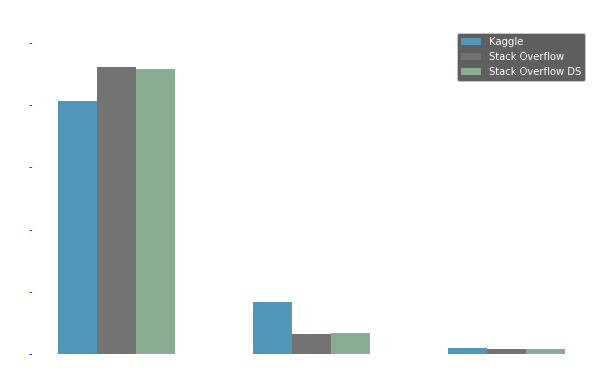

In [0]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams['text.color'] = 'white'
ind = np.arange(gender.shape[0])  # the x locations for the groups

width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind -width, gender['Kaggle'], width, yerr=None, color='#5097ba', label='Kaggle')
rects2 = ax.bar(ind,  gender['Stack Overflow'], width, yerr=None, color='#737373', label='Stack Overflow')
rects3 = ax.bar(ind +width, gender['Stack Overflow DS'], width, yerr=None, color='#89ad91', label='Stack Overflow DS')
ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14,color='white')
ax.set_title('Gender distribution', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(gender.index, fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim([0,1.05])
ax.set_yticklabels([])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='y', colors='blue')
ax.tick_params(axis='x', colors='white')
ax.legend(facecolor='#383838')


def autolabel(rects, xpos='center', fontsize='medium'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{0:.1f}'.format(height * 100), ha=ha[xpos], va='bottom', fontsize=fontsize)

        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

Age Analytics !

---



Group Kaggle data by Age 

In [0]:
age_kaggle = kaggle.groupby('Q2').Q2.count()
age_kaggle_df = pd.DataFrame(columns=['numeric', 'perc'], index=age_kaggle.index)
age_kaggle_df['numeric'] = age_kaggle
age_kaggle_df['perc'] = age_kaggle_df['numeric'] / age_kaggle_df['numeric'].sum()
age_kaggle_df

,numeric,perc
Q2,,
18-21,3037,0.127289
22-24,5141,0.215474
25-29,6159,0.258142
30-34,3776,0.158263
35-39,2253,0.094430
40-44,1360,0.057002
45-49,858,0.035961
50-54,582,0.024393
55-59,328,0.013747


Group SO data by Age 

In [0]:
age_soflow = soflow.groupby('Age').Age.count()
age_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=age_soflow.index)
age_soflow_df['numeric'] = age_soflow
age_soflow_df['perc'] = age_soflow_df['numeric'] / age_soflow_df['numeric'].sum()
age_soflow_df

,numeric,perc
Age,,
18 - 24 years old,15249,0.236148
25 - 34 years old,31759,0.491823
35 - 44 years old,11477,0.177734
45 - 54 years old,3313,0.051305
55 - 64 years old,959,0.014851
65 years or older,179,0.002772
Under 18 years old,1638,0.025366


Group SO Data Science Subset data by Age 

In [0]:
age_soflow_ds = soflow_ds.groupby('Age').Age.count()
age_soflow_ds_df = pd.DataFrame(columns=['numeric', 'perc'], index=age_soflow_ds.index)
age_soflow_ds_df['numeric'] = age_soflow_ds
age_soflow_ds_df['perc'] = age_soflow_ds_df['numeric'] / age_soflow_ds_df['numeric'].sum()
age_soflow_ds_df

,numeric,perc
Age,,
18 - 24 years old,1736,0.199243
25 - 34 years old,4192,0.481120
35 - 44 years old,1788,0.205211
45 - 54 years old,615,0.070584
55 - 64 years old,206,0.023643
65 years or older,38,0.004361
Under 18 years old,138,0.015838


Merging Age Data for vizualization

In [0]:
age = pd.DataFrame(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], index=['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 or older'])

for i1, i2 in zip(age_soflow_df.index, age.index):
    age.loc[i2]['soflow_num'] = age_soflow_df.loc[i1]['numeric']
    age.loc[i2]['soflow_ds_num'] = age_soflow_ds_df.loc[i1]['numeric']
    
age.loc['55 or older']['soflow_num'] = age_soflow_df.loc['55 - 64 years old']['numeric'] + age_soflow_df.loc['65 years or older']['numeric']

age.loc['18 - 24']['kaggle_num'] = age_kaggle_df.loc['18-21']['numeric'] + age_kaggle_df.loc['22-24']['numeric']
age.loc['25 - 34']['kaggle_num'] = age_kaggle_df.loc['25-29']['numeric'] + age_kaggle_df.loc['30-34']['numeric']
age.loc['35 - 44']['kaggle_num'] = age_kaggle_df.loc['35-39']['numeric'] + age_kaggle_df.loc['40-44']['numeric']
age.loc['45 - 54']['kaggle_num'] = age_kaggle_df.loc['45-49']['numeric'] + age_kaggle_df.loc['50-54']['numeric']
age.loc['55 or older']['kaggle_num'] = age_kaggle_df.loc['55-59']['numeric'] + age_kaggle_df.loc['60-69']['numeric'] + age_kaggle_df.loc['70-79']['numeric'] + age_kaggle_df.loc['80+']['numeric']

age['Kaggle'] = age['kaggle_num'] / age['kaggle_num'].sum()
age['Stack Overflow'] = age['soflow_num'] / age['soflow_num'].sum()
age['Stack Overflow DS'] = age['soflow_ds_num'] / age['soflow_ds_num'].sum()

age.drop(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], inplace=True)
age

,Kaggle,Stack Overflow,Stack Overflow DS
18 - 24,0.342764,0.242294,0.20335
25 - 34,0.416405,0.504624,0.491039
35 - 44,0.151431,0.18236,0.209441
45 - 54,0.0603546,0.0526408,0.0720394
55 or older,0.0290456,0.0180819,0.0241303


Age analytics viz

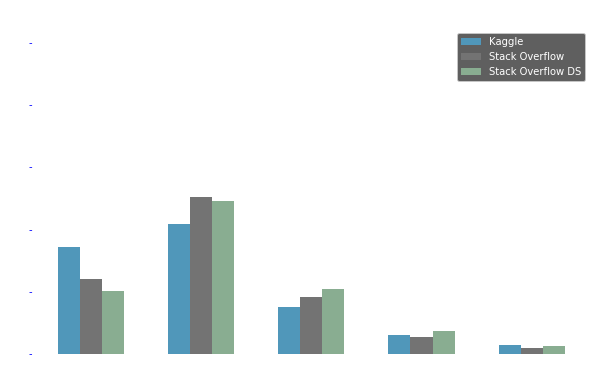

In [0]:
plt.rcParams["figure.figsize"] = [10, 6]
ind = np.arange(age.shape[0])  # the x locations for the groups
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, age['Kaggle'], width, yerr=None, color='#5097ba', label='Kaggle')
rects2 = ax.bar(ind , age['Stack Overflow'], width, yerr=None, color='#737373', label='Stack Overflow')
rects3 = ax.bar(ind + width, age['Stack Overflow DS'], width, yerr=None, color='#89ad91', label='Stack Overflow DS')

ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14,color='white')
ax.set_title('Age distribution', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(age.index, fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim([0,1.05])
ax.set_yticklabels([])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='y', colors='blue')
ax.tick_params(axis='x', colors='white')
ax.legend(facecolor='#383838')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

Demographic Analytics !

---

Group Kaggle data by Country 

In [0]:
country_kaggle = kaggle.groupby('Q3').Q3.count()
country_kaggle_df = pd.DataFrame(columns=['numeric', 'perc'], index=country_kaggle.index)
country_kaggle_df['numeric'] = country_kaggle
country_kaggle_df['perc'] = country_kaggle_df['numeric'] / country_kaggle_df['numeric'].sum()
country_kaggle_df.sort_values(by=['numeric'], ascending=False, inplace=True)
country_kaggle_df.drop(index=['I do not wish to disclose my location', 'Other'], inplace=True)
country_kaggle_df.rename({'United States of America': 'United States', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)
#country_kaggle_df

In [0]:
country_soflow_ds = soflow_ds.groupby('Country').Country.count()
country_soflow_ds_df = pd.DataFrame(columns=['numeric', 'perc'], index=country_soflow_ds.index)
country_soflow_ds_df['numeric'] = country_soflow_ds
country_soflow_ds_df['perc'] = country_soflow_ds_df['numeric'] / country_soflow_ds_df['numeric'].sum()
country_soflow_ds_df.sort_values(by=['numeric'], ascending=False, inplace=True)
country_soflow_ds_df.rename({'Russian Federation': 'Russia'}, inplace=True)
#country_soflow_ds_df

In [0]:
list1 = country_kaggle_df[:25].index.values.tolist()
list2 = country_soflow_df[:25].index.values.tolist()
list3 = country_soflow_ds_df[:25].index.values.tolist()

union = list1 + [e for e in list2 if e not in list1]

country = pd.DataFrame(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], index=union)
for c in union:
    country.loc[c] = [country_kaggle_df['numeric'].loc[c], country_soflow_df['numeric'].loc[c], country_soflow_ds_df['numeric'].loc[c]]
    
country['Kaggle'] = country['kaggle_num'] / country_kaggle_df['numeric'].sum()
country['Stack Overflow'] = country['soflow_num'] / country_soflow_df['numeric'].sum()
country['Stack Overflow DS'] = country['soflow_ds_num'] / country_soflow_ds_df['numeric'].sum()

country.drop(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], inplace=True)
country = country[:15]
country

,Kaggle,Stack Overflow,Stack Overflow DS
United States,0.210263,0.206302,0.248884
India,0.196933,0.139380,0.105041
China,0.073298,0.010534,0.010309
Russia,0.039190,0.029144,0.025164
Brazil,0.032815,0.025446,0.028087
Germany,0.032725,0.065612,0.065752
United Kingdom,0.031299,0.063194,0.064616
France,0.026929,0.026127,0.023460
Canada,0.026929,0.034467,0.037828
Japan,0.026617,0.003667,0.004708


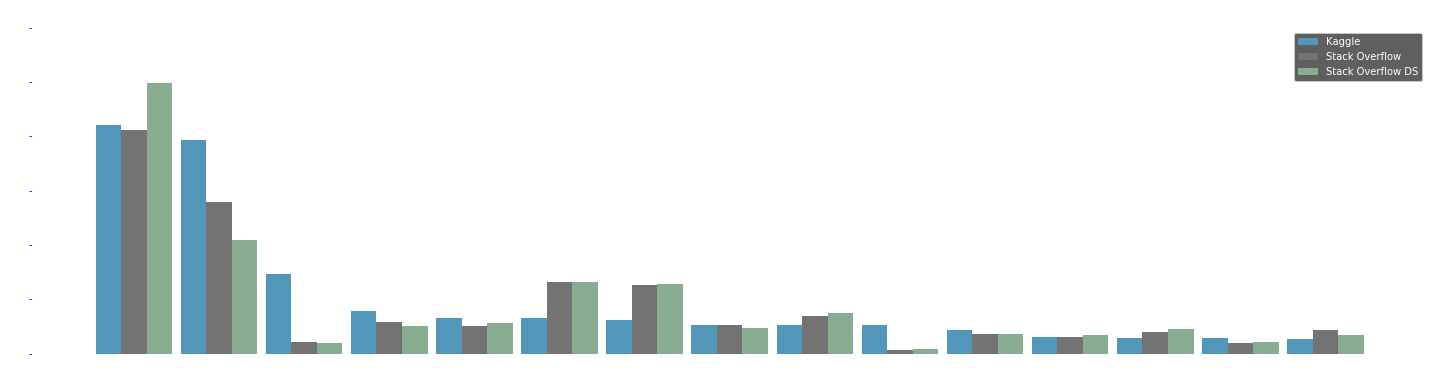

In [0]:
plt.rcParams["figure.figsize"] = [25, 6]
ind = np.arange(country.shape[0])  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, country['Kaggle'], width, yerr=None, color='#5097ba', label='Kaggle')
rects2 = ax.bar(ind, country['Stack Overflow'], width, yerr=None, color='#737373', label='Stack Overflow')
rects3 = ax.bar(ind + width, country['Stack Overflow DS'], width, yerr=None, color='#89ad91', label='Stack Overflow DS')

ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14,color='white')
ax.set_title('Demographic (home countries) analytics', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(country.index, fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim([0,0.3])
ax.set_yticklabels([])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='y', colors='blue')
ax.tick_params(axis='x', colors='white')
ax.legend(facecolor='#383838')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()


Education Analytics !

---

Group Kaggle data by Education 

In [0]:
education_kaggle = kaggle.groupby('Q4').Q4.count()
education_kaggle_df = pd.DataFrame(columns=['numeric', 'perc'], index=education_kaggle.index)
education_kaggle_df['numeric'] = education_kaggle
education_kaggle_df['perc'] = education_kaggle_df['numeric'] / education_kaggle_df['numeric'].sum()
education_kaggle_df.sort_values(by=['numeric'], ascending=False, inplace=True)
education_kaggle_df.drop(index=['I prefer not to answer'], inplace=True)

education_kaggle_df

,numeric,perc
Q4,,
Master’s degree,10855,0.463137
Bachelor’s degree,7083,0.302202
Doctoral degree,3357,0.143229
Some college/university study without earning a bachelor’s degree,967,0.041258
Professional degree,599,0.025557
No formal education past high school,232,0.009898


In [0]:
education_soflow = soflow.groupby('FormalEducation').FormalEducation.count()
education_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=education_soflow.index)
education_soflow_df['numeric'] = education_soflow
education_soflow_df['perc'] = education_soflow_df['numeric'] / education_soflow_df['numeric'].sum()
education_soflow_df.sort_values(by=['numeric'], ascending=False, inplace=True)
education_soflow_df.rename({'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree', 
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
                            'Some college/university study without earning a degree': 'Some college/university study without earning a bachelor’s degree',
                            'Professional degree (JD, MD, etc.)': 'Professional degree',
                            'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                            'I never completed any formal education': 'No formal education past high school'
                           }, inplace=True)

education_soflow_df.loc['Bachelor’s degree'] = education_soflow_df.loc['Bachelor’s degree'] + education_soflow_df.loc['Associate degree']
education_soflow_df.loc['No formal education past high school'] = education_soflow_df.loc['No formal education past high school'] + education_soflow_df.loc['Primary/elementary school'] + education_soflow_df.loc['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']
education_soflow_df.drop(index=['Associate degree', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'], inplace=True)

education_soflow_df

,numeric,perc
FormalEducation,,
Bachelor’s degree,46629.0,0.492371
Master’s degree,21396.0,0.225927
Some college/university study without earning a bachelor’s degree,11710.0,0.123650
Doctoral degree,2214.0,0.023378
Professional degree,1447.0,0.015279
No formal education past high school,11307.0,0.119394


In [0]:
education_soflow_ds = soflow_ds.groupby('FormalEducation').FormalEducation.count()
education_soflow_ds_df = pd.DataFrame(columns=['numeric', 'perc'], index=education_soflow_ds.index)
education_soflow_ds_df['numeric'] = education_soflow_ds
education_soflow_ds_df['perc'] = education_soflow_ds_df['numeric'] / education_soflow_ds_df['numeric'].sum()
education_soflow_ds_df.sort_values(by=['numeric'], ascending=False, inplace=True)
education_soflow_ds_df.rename({'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree', 
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
                            'Some college/university study without earning a degree': 'Some college/university study without earning a bachelor’s degree',
                            'Professional degree (JD, MD, etc.)': 'Professional degree',
                            'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                            'I never completed any formal education': 'No formal education past high school'
                           }, inplace=True)

education_soflow_ds_df.loc['Bachelor’s degree'] = education_soflow_ds_df.loc['Bachelor’s degree'] + education_soflow_ds_df.loc['Associate degree']
education_soflow_ds_df.loc['No formal education past high school'] = education_soflow_ds_df.loc['No formal education past high school'] + education_soflow_ds_df.loc['Primary/elementary school'] + education_soflow_ds_df.loc['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']
education_soflow_ds_df.drop(index=['Associate degree', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'], inplace=True)

education_soflow_ds_df

,numeric,perc
FormalEducation,,
Bachelor’s degree,5170.0,0.427026
Master’s degree,3635.0,0.300240
Some college/university study without earning a bachelor’s degree,1232.0,0.101759
Doctoral degree,906.0,0.074833
Professional degree,191.0,0.015776
No formal education past high school,973.0,0.080367


In [0]:
education = pd.DataFrame(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], index=education_kaggle_df.index)
for e in education.index:
    education.loc[e] = [education_kaggle_df['numeric'].loc[e], education_soflow_df['numeric'].loc[e], education_soflow_ds_df['numeric'].loc[e]]
    
education['Kaggle'] = education['kaggle_num'] / education_kaggle_df['numeric'].sum()
education['Stack Overflow'] = education['soflow_num'] / education_soflow_df['numeric'].sum()
education['Stack Overflow DS'] = education['soflow_ds_num'] / education_soflow_ds_df['numeric'].sum()

education.drop(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], inplace=True)
education

,Kaggle,Stack Overflow,Stack Overflow DS
Q4,,,
Master’s degree,0.470056,0.225927,0.30024
Bachelor’s degree,0.306716,0.492371,0.427026
Doctoral degree,0.145369,0.0233784,0.0748327
Some college/university study without earning a bachelor’s degree,0.0418742,0.12365,0.101759
Professional degree,0.0259386,0.0152793,0.015776
No formal education past high school,0.0100463,0.119394,0.0803667


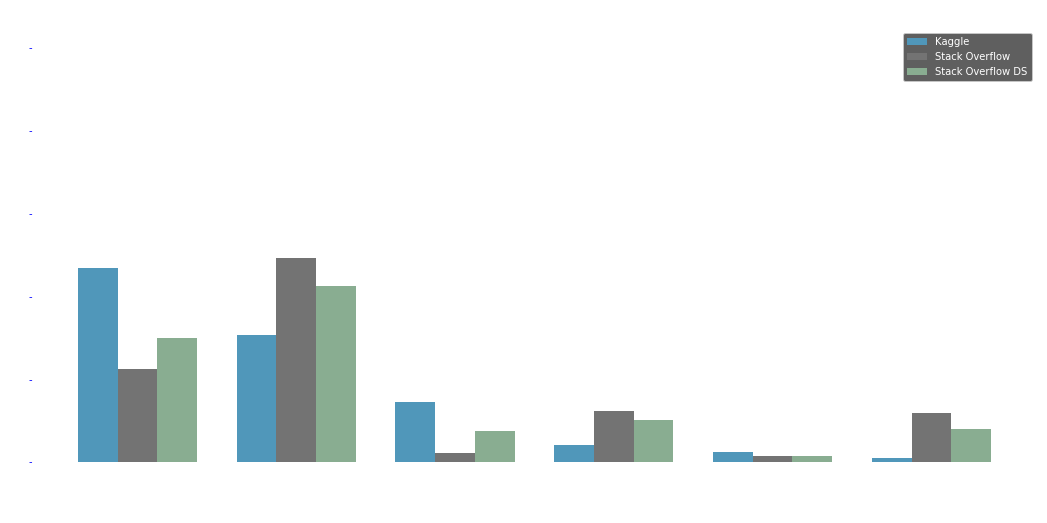

In [0]:
plt.rcParams["figure.figsize"] = [18, 8]
ind = np.arange(education.shape[0])  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, education['Kaggle'], width, yerr=None, color='#5097ba', label='Kaggle')
rects2 = ax.bar(ind, education['Stack Overflow'], width, yerr=None, color='#737373', label='Stack Overflow')
rects3 = ax.bar(ind + width, education['Stack Overflow DS'], width, yerr=None, color='#89ad91', label='Stack Overflow DS')

ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14,color='white')
ax.set_title('Level of Education distribution', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(['Masters \ndegree', 
                    'Bachelors \ndegree', 
                    'Doctoral \ndegree', 
                    'Some college or university \nstudy without earning a \nbachelors degree', 
                    'Professional \ndegree', 
                    'No formal education \npast high school'], fontsize=14, rotation = 0, ha="center")
ax.legend(fontsize=14)
ax.set_ylim([0,1.05])
ax.set_yticklabels([])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='y', colors='blue')
ax.tick_params(axis='x', colors='white')
ax.legend(facecolor='#383838')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

Analytics on UG Specialization!

---

In [0]:
undergrad_kaggle = kaggle.groupby('Q5').Q5.count()
undergrad_kaggle_df = pd.DataFrame(columns=['numeric', 'perc'], index=undergrad_kaggle.index)
undergrad_kaggle_df['numeric'] = undergrad_kaggle
undergrad_kaggle_df['perc'] = undergrad_kaggle_df['numeric'] / undergrad_kaggle_df['numeric'].sum()

undergrad_kaggle_df.rename({'Physics or astronomy': 'Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'}, inplace=True)
undergrad_kaggle_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] = undergrad_kaggle_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] + undergrad_kaggle_df.loc['Medical or life sciences (biology, chemistry, medicine, etc.)'] + undergrad_kaggle_df.loc['Environmental science or geology']
undergrad_kaggle_df.drop(index=['Medical or life sciences (biology, chemistry, medicine, etc.)','Environmental science or geology'], inplace=True)
undergrad_kaggle_df.sort_values(by=['numeric'], ascending=False, inplace=True)

#undergrad_kaggle_df

In [0]:
undergrad_soflow = soflow.groupby('UndergradMajor').UndergradMajor.count()
undergrad_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=undergrad_soflow.index)
undergrad_soflow_df['numeric'] = undergrad_soflow
undergrad_soflow_df['perc'] = undergrad_soflow_df['numeric'] / undergrad_soflow_df['numeric'].sum()

undergrad_soflow_df.rename({'Computer science, computer engineering, or software engineering': 'Computer science (software engineering, etc.)', 
                            'Another engineering discipline (ex. civil, electrical, mechanical)': 'Engineering (non-computer focused)',
                            'Information systems, information technology, or system administration': 'Information technology, networking, or system administration',
                            'A natural science (ex. biology, chemistry, physics)': 'Medical or natural sciences (ex. biology, chemistry, physics, astronomy)',
                            'A business discipline (ex. accounting, finance, marketing)': 'A business discipline (accounting, economics, finance, etc.)',
                            'A humanities discipline (ex. literature, history, philosophy)': 'Humanities (history, literature, philosophy, etc.)',
                            'A social science (ex. anthropology, psychology, political science)': 'Social sciences (anthropology, psychology, sociology, etc.)',
                            'Fine arts or performing arts (ex. graphic design, music, studio art)': 'Fine arts or performing arts',
                            'Web development or web design': 'Other'
                           }, inplace=True)

undergrad_soflow_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] = undergrad_soflow_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] + undergrad_soflow_df.loc['A health science (ex. nursing, pharmacy, radiology)']
undergrad_soflow_df.drop(index=['A health science (ex. nursing, pharmacy, radiology)'], inplace=True)
undergrad_soflow_df.sort_values(by=['numeric'], ascending=False, inplace=True)

#undergrad_soflow_df

In [0]:
undergrad_soflow_ds = soflow_ds.groupby('UndergradMajor').UndergradMajor.count()
undergrad_soflow_ds_df = pd.DataFrame(columns=['numeric', 'perc'], index=undergrad_soflow_ds.index)
undergrad_soflow_ds_df['numeric'] = undergrad_soflow_ds
undergrad_soflow_ds_df['perc'] = undergrad_soflow_ds_df['numeric'] / undergrad_soflow_ds_df['numeric'].sum()

undergrad_soflow_ds_df.rename({'Computer science, computer engineering, or software engineering': 'Computer science (software engineering, etc.)', 
                            'Another engineering discipline (ex. civil, electrical, mechanical)': 'Engineering (non-computer focused)',
                            'Information systems, information technology, or system administration': 'Information technology, networking, or system administration',
                            'A natural science (ex. biology, chemistry, physics)': 'Medical or natural sciences (ex. biology, chemistry, physics, astronomy)',
                            'A business discipline (ex. accounting, finance, marketing)': 'A business discipline (accounting, economics, finance, etc.)',
                            'A humanities discipline (ex. literature, history, philosophy)': 'Humanities (history, literature, philosophy, etc.)',
                            'A social science (ex. anthropology, psychology, political science)': 'Social sciences (anthropology, psychology, sociology, etc.)',
                            'Fine arts or performing arts (ex. graphic design, music, studio art)': 'Fine arts or performing arts',
                            'Web development or web design': 'Other'
                           }, inplace=True)

undergrad_soflow_ds_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] = undergrad_soflow_ds_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] + undergrad_soflow_ds_df.loc['A health science (ex. nursing, pharmacy, radiology)']
undergrad_soflow_ds_df.drop(index=['A health science (ex. nursing, pharmacy, radiology)'], inplace=True)
undergrad_soflow_ds_df.sort_values(by=['numeric'], ascending=False, inplace=True)

#undergrad_soflow_ds_df

In [0]:
undergrad = pd.DataFrame(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], index=undergrad_kaggle_df.index)
for e in undergrad.index:
    undergrad.loc[e] = [undergrad_kaggle_df['numeric'].loc[e], undergrad_soflow_df['numeric'].loc[e], undergrad_soflow_ds_df['numeric'].loc[e]]
    
undergrad['Kaggle'] = undergrad['kaggle_num'] / undergrad_kaggle_df['numeric'].sum()
undergrad['Stack Overflow'] = undergrad['soflow_num'] / undergrad_soflow_df['numeric'].sum()
undergrad['Stack Overflow DS'] = undergrad['soflow_ds_num'] / undergrad_soflow_ds_df['numeric'].sum()

undergrad.drop(columns=['kaggle_num', 'soflow_num','soflow_ds_num'], inplace=True)
#undergrad

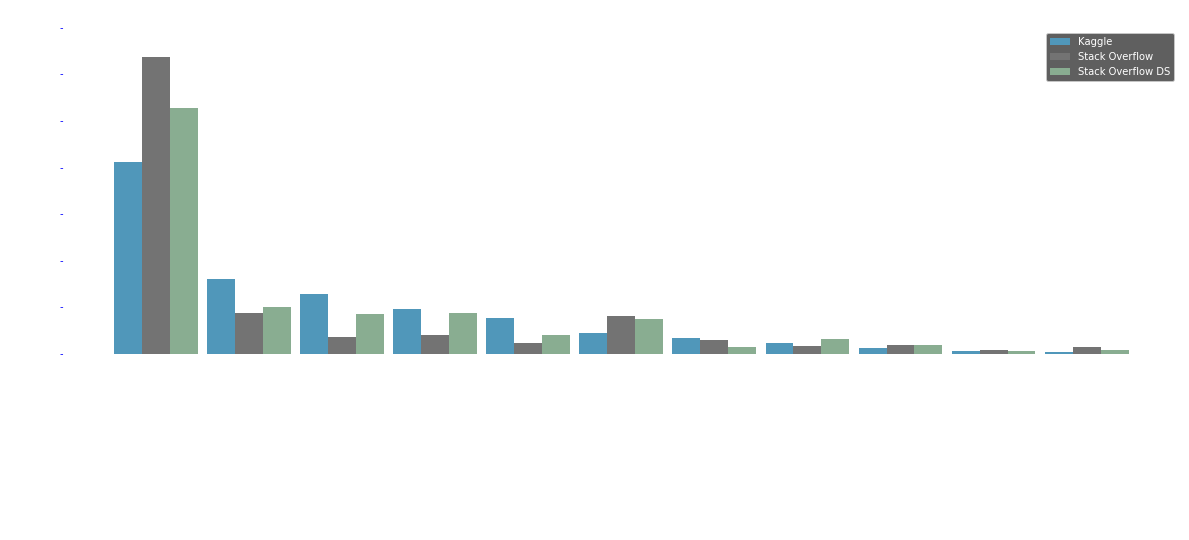

In [0]:
plt.rcParams["figure.figsize"] = [20, 6]
ind = np.arange(undergrad.shape[0])  # the x locations for the groups
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, undergrad['Kaggle'], width, yerr=None, color='#5097ba', label='Kaggle')
rects2 = ax.bar(ind , undergrad['Stack Overflow'], width, yerr=None, color='#737373', label='Stack Overflow')
rects3 = ax.bar(ind + width, undergrad['Stack Overflow DS'], width, yerr=None, color='#89ad91', label='Stack Overflow DS')

ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14,color='white')
ax.set_title('Area of Specialization distribution', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(['Computer science \n(software engineering, \netc.)',
                    'Engineering \n(non-computer focused)', 'Mathematics or statistics',
                    'Medical or natural sciences \n(ex. biology, chemistry, \nphysics, astronomy)',
                    'A business discipline \n(accounting, economics, \nfinance, etc.)',
                    'Information technology, \nnetworking, or system \nadministration', 'Other',
                    'Social sciences \n(anthropology, psychology, \nsociology, etc.)',
                    'Humanities \n(history, literature, \nphilosophy, etc.)',
                    'I never declared a major', 'Fine arts or \nperforming arts'], fontsize=14, rotation = 45, ha="right")
ax.legend(fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim([0,0.7])
ax.set_yticklabels([])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(axis='y', colors='blue')
ax.tick_params(axis='x', colors='white')
ax.legend(facecolor='#383838')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()

Clustering on SO data

---



In [0]:
# random categorical data
data = pd.read_csv('survey_results_public.csv')
data.fillna(0)
#print(data)
null_cols = data.columns[data.isnull().any().tolist()]
for i in null_cols:
   data[i].fillna("Not Available", inplace = True)
   data[i] = data[i].astype(str)
#print(data)
#print(data.count())
km = KModes(n_clusters=10, init='Huang', n_init=1, verbose=1)

clusters = km.fit_predict(data)
             
print(clusters)
# Print the cluster centroids

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 52385, cost: 6003736.0
Run 1, iteration: 2/100, moves: 21364, cost: 5960570.0
Run 1, iteration: 3/100, moves: 16298, cost: 5941976.0
Run 1, iteration: 4/100, moves: 5559, cost: 5938747.0
Run 1, iteration: 5/100, moves: 4309, cost: 5935230.0
Run 1, iteration: 6/100, moves: 5059, cost: 5917808.0
Run 1, iteration: 7/100, moves: 7497, cost: 5911138.0
Run 1, iteration: 8/100, moves: 1873, cost: 5909260.0
Run 1, iteration: 9/100, moves: 1506, cost: 5908944.0
Run 1, iteration: 10/100, moves: 271, cost: 5908944.0
[5 6 3 ... 8 8 8]


In [0]:

data['cluster_number'] = clusters.tolist()
data


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,cluster_number
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3.0,1.0,...,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,Not Available,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,Not Available,The survey was an appropriate length,Very easy,5
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,Not Available,The survey was an appropriate length,Somewhat easy,6
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Eng

Counter({0: 26187, 1: 16504, 6: 13452, 5: 8742, 7: 8657, 8: 8110, 3: 6376, 2: 4694, 4: 3977, 9: 2156})


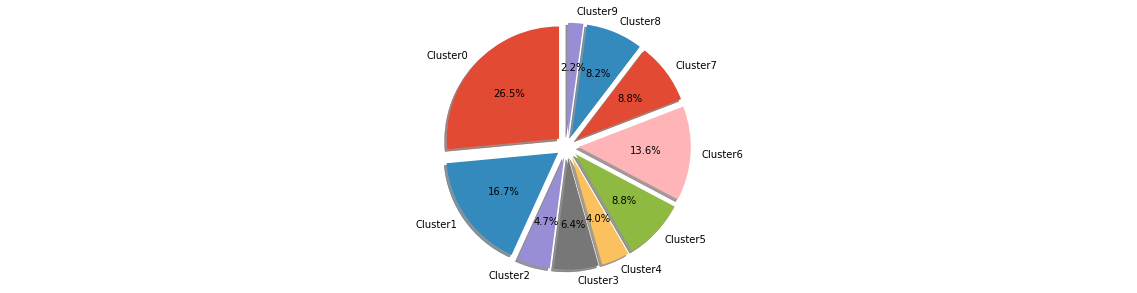

In [0]:
import collections
values = collections.Counter(clusters)
print(values)

g0 = values[0]
g1 = values[1]
g2 = values[2]
g3 = values[3]
g4 = values[4]
g5 = values[5]
g6 = values[6]
g7 = values[7]
g8 = values[8]
g9 = values[9]


labels = "Cluster0", "Cluster1", "Cluster2" , "Cluster3","Cluster4", "Cluster5", "Cluster6" , "Cluster7","Cluster8", "Cluster9"
sizes = [g0, g1, g2, g3, g4, g5, g6, g7, g8, g9]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

SO CLUSTERING

Preprocessing

In [0]:
# Read in the survey results, shuffle results
print(">> Loading data")
df = pd.read_csv('survey_results_public.csv', low_memory=False).sample(frac=1)

# Columns with multiple choice options
MULTIPLE_CHOICE = [
    'CommunicationTools','EducationTypes','SelfTaughtTypes','HackathonReasons', 
    'DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith',
    'PlatformDesireNextYear','Methodology','VersionControl',
    'AdBlockerReasons','AdsActions','ErgonomicDevices','Gender',
    'SexualOrientation','RaceEthnicity', 'LanguageWorkedWith',
    'IDE', 'FrameworkWorkedWith', 'FrameworkDesireNextYear',
    'LanguageDesireNextYear', 'DevType',
]

# Columns which we are not interested in
DROP_COLUMNS = [
    'Salary', 'SalaryType', 'Respondent', 'CurrencySymbol'
]

# Drop too easy columns
print(">> Deleting uninteresting or redundant columns: {DROP_COLUMNS}")
df.drop(DROP_COLUMNS, axis=1, inplace=True)

# Go through all object columns
for c in MULTIPLE_CHOICE:
    
    # Check if there are multiple entries in this column
    temp = df[c].str.split(';', expand=True)

    # Get all the possible values in this column
    new_columns = pd.unique(temp.values.ravel())
    for new_c in new_columns:
        if new_c and new_c is not np.nan:

            # Create new column for each unique column
            idx = df[c].str.contains(new_c, regex=False).fillna(False)
            df.loc[idx, "{c}_{new_c}"] = 1

    # Info to the user
    print(">> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns")

    # Drop the original column
    df.drop(c, axis=1, inplace=True)
        
# For all the remaining categorical columns, create dummy columns
df = pd.get_dummies(df)

# Fill in missing values
df.dropna(axis=1, how='all', inplace=True)
dummy_columns = [c for c in df.columns if len(df[c].unique()) == 2]
non_dummy = [c for c in df.columns if c not in dummy_columns]
df[dummy_columns] = df[dummy_columns].fillna(0)
df[non_dummy] = df[non_dummy].fillna(df[non_dummy].median())
print(">> Filled NaNs in {len(dummy_columns)} OHE columns with 0")
print(">> Filled NaNs in {len(non_dummy)} non-OHE columns with median values")

# Create correlation matrix
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(">> Dropping the following columns due to high correlations: {to_drop}")
df = df.drop(to_drop, axis=1)

# Perform scaling on all non-dummy columns. Create X and y
nondummy_columns = [c for c in df.columns if df[c].max() > 1]
X = deepcopy(df)
X.loc[:, nondummy_columns] = scale(df[nondummy_columns])
X.drop('ConvertedSalary', axis=1, inplace=True)
print(">> Shape of final dataframe X: {X.shape}")


>> Loading data
>> Deleting uninteresting or redundant columns: {DROP_COLUMNS}
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns
>> Multiple entries in {c}. Added {len(new_columns)} one-hot-en

PCA fo SO preprocessed data

In [0]:
  # Create a PCA object, specifying how many components we wish to keep
pca = PCA(n_components=50)

# Run PCA on scaled numeric dataframe, and retrieve the projected data
pca_trafo = pca.fit_transform(X)

# The transformed data is in a numpy matrix. This may be inconvenient if we want to further
# process the data, and have a more visual impression of what each column is etc. We therefore
# put transformed/projected data into new dataframe, where we specify column names and index
pca_df = pd.DataFrame(
    pca_trafo,
    index=X.index,
    columns=["PC" + str(i + 1) for i in range(pca_trafo.shape[1])]
)
print (pca_df.shape)
print(df.shape)

NameError: ignored

In [0]:
print ("BEFORE CORRELATION AND PCA")
print(df.shape)

print ("AFTER CORRELATION AND PCA")
print (pca_df.shape)


BEFORE CORRELATION AND PCA


NameError: ignored

CLUSTERING

In [0]:
#HDBSCAN & T-SNE

# Create a sample dataset
sample = X.sample(30000)

print(datetime.datetime.now())
print(">> Clustering using HDBSCAN")
clusterer = hdbscan.HDBSCAN(min_cluster_size=500)
clusterer.fit(sample)

print(datetime.datetime.now())
print(">> Dimensionality reduction using TSNE")
projection = TSNE(init='pca', random_state=42).fit_transform(sample)


2019-12-17 00:39:25.048145
>> Clustering using HDBSCAN
2019-12-17 00:59:30.075720
>> Dimensionality reduction using TSNE


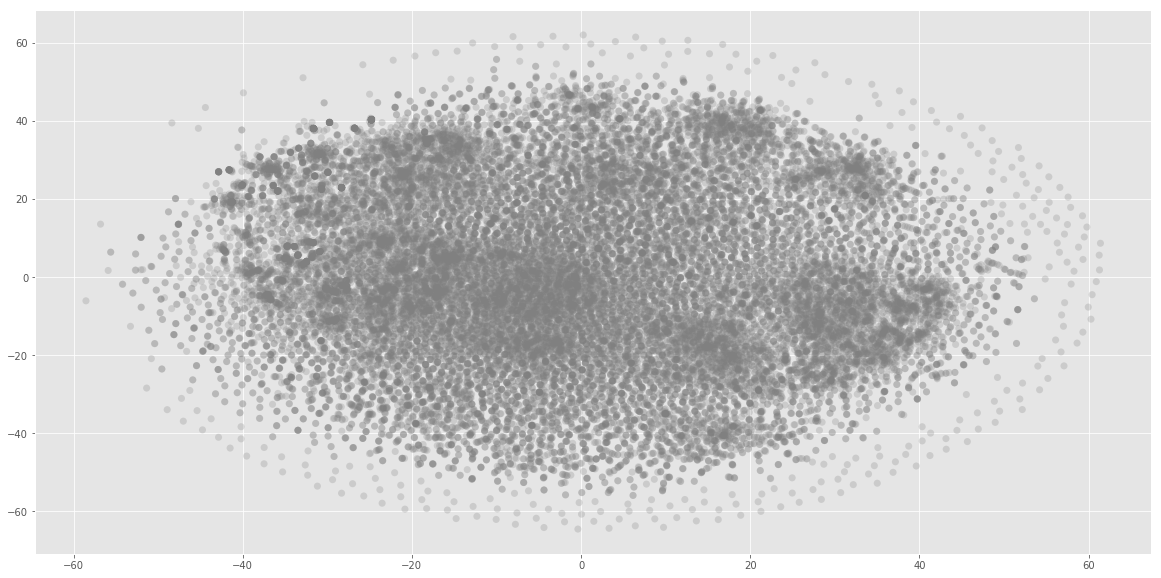

In [0]:
#visualization
def get_cluster_colors(clusterer, palette='Paired'):
    """Create cluster colors based on labels and probability assignments"""
    n_clusters = len(np.unique(clusterer.labels_))
    color_palette = sns.color_palette(palette, n_clusters)
    cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
    if hasattr(clusterer, 'probabilities_'):
        cluster_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]
    return cluster_colors

# Create the plot on the TSNE projection with HDBSCAN colors
_, ax = plt.subplots(1, figsize=(20, 10))
ax.scatter(
    *projection.T, 
    s=50, linewidth=0, 
    c=get_cluster_colors(clusterer), 
    alpha=0.25
)
plt.show()

KMeans & T-SNE

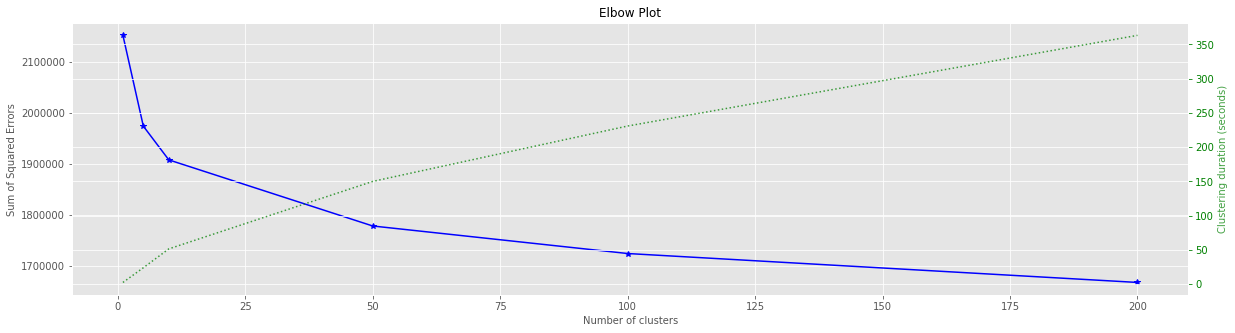

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=42)
skplt.cluster.plot_elbow_curve(kmeans, sample, cluster_ranges=[1, 5, 10, 50, 100, 200])
plt.show()

NameError: ignored

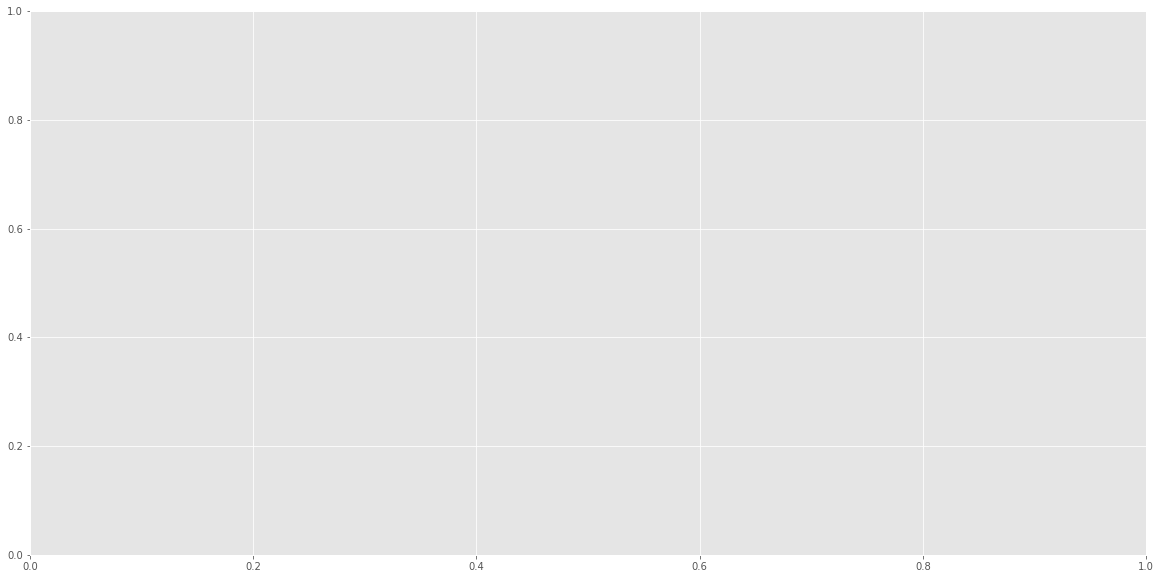

In [0]:
# Create the plot on the TSNE projection with HDBSCAN colors
_, ax = plt.subplots(1, figsize=(20, 10))
kmeans = KMeans(n_clusters=6).fit(sample)
ax.scatter(
    *projection.T, 
    s=50, linewidth=0, 
    c=get_cluster_colors(kmeans, 'hls'), 
    alpha=0.25
)
plt.show()